In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
data = pd.read_csv("B:/Projects/PycharmProjects/PPMI_Research_on_Parkinson's/src/mahbub/finalDatasetWithUPDRSScore.csv")

# Define non-feature, numerical, and categorical columns
non_feature_columns = ['Patient ID', 'Visit Date', 'UPDRS_SCORE', 'Visit', 'Visit_int',
                       'NHY', 'DATSCAN_PUTAMEN_R', 'DATSCAN_CAUDATE_R', 'DATSCAN_CAUDATE_L',
                       'DATSCAN_PUTAMEN_L_ANT', 'DATSCAN_PUTAMEN_R_ANT', 'DATSCAN_PUTAMEN_L']
numerical_features = [
    'Area', 'Circularity', 'ConvexArea', 'EquivDiameter', 'Extent',
    'FilledArea', 'Kurtosis', 'Major axis length', 'Mean',
    'Minor axis length', 'PA_ratio', 'Shannon_Entropy', 'Skewness',
    'Solidity', 'Standard Deviation', 'brightness', 'contrast',
    'correlation', 'dissimilarity', 'energy', 'gabor_energy',
    'gabor_entropy', 'homogeneity', 'lbp_energy', 'lbp_entropy'
]
categorical_features = [
    'NP1ANXS', 'NP1APAT', 'NP1COG', 'NP1DDS', 'NP1DPRS',
    'NP1HALL', 'NP1CNST', 'NP1FATG', 'NP1LTHD', 'NP1PAIN', 'NP1SLPD',
    'NP1SLPN', 'NP1URIN', 'NP2DRES', 'NP2EAT', 'NP2FREZ', 'NP2HOBB',
    'NP2HWRT', 'NP2HYGN', 'NP2RISE', 'NP2SALV', 'NP2SPCH', 'NP2SWAL',
    'NP2TRMR', 'NP2TURN', 'NP2WALK', 'NP3BRADY', 'NP3FACXP', 'NP3FRZGT',
    'NP3FTAPL', 'NP3FTAPR', 'NP3GAIT', 'NP3HMOVL', 'NP3HMOVR', 'NP3KTRML',
    'NP3KTRMR', 'NP3LGAGL', 'NP3LGAGR', 'NP3POSTR', 'NP3PRSPL', 'NP3PRSPR',
    'NP3PSTBL', 'NP3PTRML', 'NP3PTRMR', 'NP3RIGLL', 'NP3RIGLU', 'NP3RIGN',
    'NP3RIGRL', 'NP3RIGRU', 'NP3RISNG', 'NP3RTALJ', 'NP3RTALL', 'NP3RTALU',
    'NP3RTARL', 'NP3RTARU', 'NP3RTCON', 'NP3SPCH', 'NP3TTAPL', 'NP3TTAPR'
]
target_column = "Disease_Severity"

# Preprocessing pipeline for numerical features
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Split data into X (features) and y (target)
X = data[numerical_features + categorical_features]
y = data[target_column]

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=10)  # Adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Print the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio of each principal component:\n", explained_variance)

# Print the most valuable features for each principal component
components = pca.components_
most_valuable_features = [np.abs(components[i]).argmax() for i in range(components.shape[0])]
most_valuable_features_names = [X.columns[i] for i in most_valuable_features]

print("\nMost valuable features for each principal component:")
for i, feature in enumerate(most_valuable_features_names):
    print(f"Principal Component {i+1}: {feature}")

# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'AdaBoost': AdaBoostClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naïve Bayes': GaussianNB(),
    'XGB': XGBClassifier()
}

# Train and evaluate each classifier using PCA reduced features
for name, clf in classifiers.items():
    clf.fit(X_train_pca, y_train)
    y_train_pred = clf.predict(X_train_pca)
    y_test_pred = clf.predict(X_test_pca)
    
    # Calculate metrics for training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    # Calculate metrics for testing set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    # Print metrics
    print(f"\n{name}:")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")


Explained variance ratio of each principal component:
 [0.18465546 0.10744269 0.07679134 0.07371708 0.03832919 0.03273571
 0.02856471 0.02784115 0.02406436 0.02151617]

Most valuable features for each principal component:
Principal Component 1: NP3FTAPL
Principal Component 2: NP3FTAPL
Principal Component 3: NP3RTCON
Principal Component 4: NP3RTCON
Principal Component 5: NP1SLPN
Principal Component 6: NP3RIGN
Principal Component 7: NP1SLPN
Principal Component 8: NP2HWRT
Principal Component 9: NP3TTAPL
Principal Component 10: NP2HWRT

Random Forest:
Training Accuracy: 1.0000
Testing Accuracy: 0.8285
Precision: 0.8347
Recall: 0.8285
F1-score: 0.8223

Logistic Regression:
Training Accuracy: 0.9373
Testing Accuracy: 0.8832
Precision: 0.8959
Recall: 0.8832
F1-score: 0.8774


B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



AdaBoost:
Training Accuracy: 0.5408
Testing Accuracy: 0.5036
Precision: 0.3275
Recall: 0.5036
F1-score: 0.3841

Decision Tree:
Training Accuracy: 1.0000
Testing Accuracy: 0.8358
Precision: 0.8373
Recall: 0.8358
F1-score: 0.8352

Gradient Boosting:
Training Accuracy: 1.0000
Testing Accuracy: 0.8540
Precision: 0.8559
Recall: 0.8540
F1-score: 0.8528

KNN:
Training Accuracy: 0.8401
Testing Accuracy: 0.7372
Precision: 0.7359
Recall: 0.7372
F1-score: 0.7179

SVM:
Training Accuracy: 0.9420
Testing Accuracy: 0.8358
Precision: 0.8535
Recall: 0.8358
F1-score: 0.8273

Naïve Bayes:
Training Accuracy: 0.8354
Testing Accuracy: 0.7810
Precision: 0.7952
Recall: 0.7810
F1-score: 0.7747


B:\Projects\PycharmProjects\PPMI_Research_on_Parkinson's\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



XGB:
Training Accuracy: 1.0000
Testing Accuracy: 0.8723
Precision: 0.8822
Recall: 0.8723
F1-score: 0.8689


In [2]:
# 1. Explained Variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio of each principal component:\n", explained_variance)

Explained variance ratio of each principal component:
 [0.18465546 0.10744269 0.07679134 0.07371708 0.03832919 0.03273571
 0.02856471 0.02784115 0.02406436 0.02151617]


Cumulative explained variance:
 [0.18465546 0.29209815 0.36888949 0.44260657 0.48093576 0.51367146
 0.54223618 0.57007733 0.59414168 0.61565785]


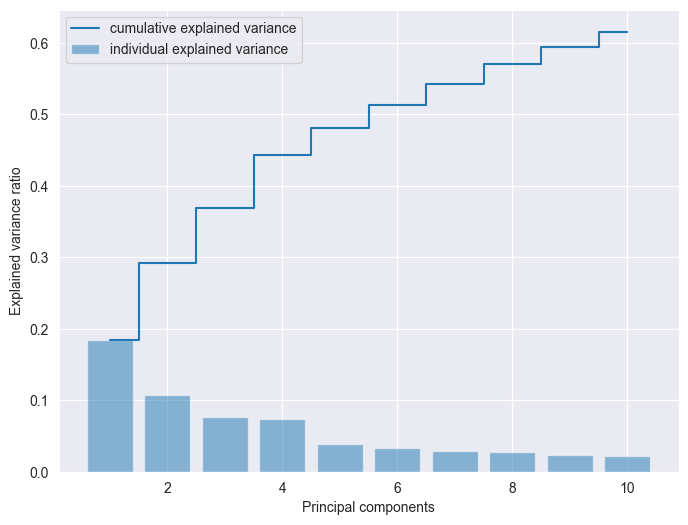

In [3]:
# 2. Cumulative Variance
cumulative_variance = np.cumsum(explained_variance)
print("Cumulative explained variance:\n", cumulative_variance)

# Plot the explained variance ratio and cumulative variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [4]:
components = pca.components_
feature_names = X.columns

print("\nTop 20 features for each principal component:")
for i in range(components.shape[0]):
    top_features_indices = np.argsort(np.abs(components[i]))[::-1][:5]
    top_features = feature_names[top_features_indices]
    print(f"\nPrincipal Component {i+1}:")
    for feature in top_features:
        print(f"{feature}")


Top 20 features for each principal component:

Principal Component 1:
NP3FTAPL
NP3HMOVL
NP3TTAPL
NP2SALV
NP2HOBB

Principal Component 2:
NP3FTAPL
NP3PRSPL
NP3RTARU
NP3HMOVL
NP3TTAPL

Principal Component 3:
NP3RTCON
NP3RTARU
NP1SLPN
NP3FTAPR
NP3HMOVR

Principal Component 4:
NP3RTCON
NP2TRMR
NP3RTARU
NP3RTALU
NP1SLPN

Principal Component 5:
NP1SLPN
NP2SALV
NP2SPCH
NP1PAIN
NP2HWRT

Principal Component 6:
NP3RIGN
NP3RIGLL
NP3LGAGR
NP3TTAPR
NP3RIGLU

Principal Component 7:
NP1SLPN
NP2SALV
NP1ANXS
NP1DPRS
NP2WALK

Principal Component 8:
NP2HWRT
NP1URIN
NP3POSTR
NP3GAIT
NP3RISNG

Principal Component 9:
NP3TTAPL
NP2SALV
NP3TTAPR
NP3HMOVR
NP3LGAGR

Principal Component 10:
NP2HWRT
NP1ANXS
NP1DPRS
NP2SALV
NP1PAIN


                 PC1                 PC2                 PC3  \
0  NP3FTAPL (0.2100)  NP3FTAPL (-0.3294)  NP3RTCON (-0.4365)   
1  NP3HMOVL (0.2054)  NP3PRSPL (-0.3290)  NP3RTARU (-0.3048)   
2  NP3TTAPL (0.1992)   NP3RTARU (0.2965)    NP1SLPN (0.2922)   
3   NP2SALV (0.1951)  NP3HMOVL (-0.2799)  NP3FTAPR (-0.2267)   
4   NP2HOBB (0.1922)  NP3TTAPL (-0.2717)  NP3HMOVR (-0.2267)   
5   NP2DRES (0.1912)  NP3RTALU (-0.2594)  NP3PRSPR (-0.1953)   
6  NP3TTAPR (0.1856)  NP3RIGLU (-0.2445)    NP1FATG (0.1925)   
7  NP3FTAPR (0.1840)   NP3RIGRU (0.2246)    NP1SLPD (0.1914)   
8   NP2HWRT (0.1828)  NP3LGAGL (-0.2053)    NP1PAIN (0.1780)   
9  NP3HMOVR (0.1826)   NP3FTAPR (0.1952)    NP2SALV (0.1780)   

                  PC4                 PC5                 PC6  \
0   NP3RTCON (0.6069)    NP1SLPN (0.5253)   NP3RIGN (-0.3614)   
1    NP2TRMR (0.3168)   NP2SALV (-0.4691)  NP3RIGLL (-0.3404)   
2   NP3RTARU (0.2740)   NP2SPCH (-0.3080)   NP3LGAGR (0.2959)   
3   NP3RTALU (0.2701)    NP1PAIN (0

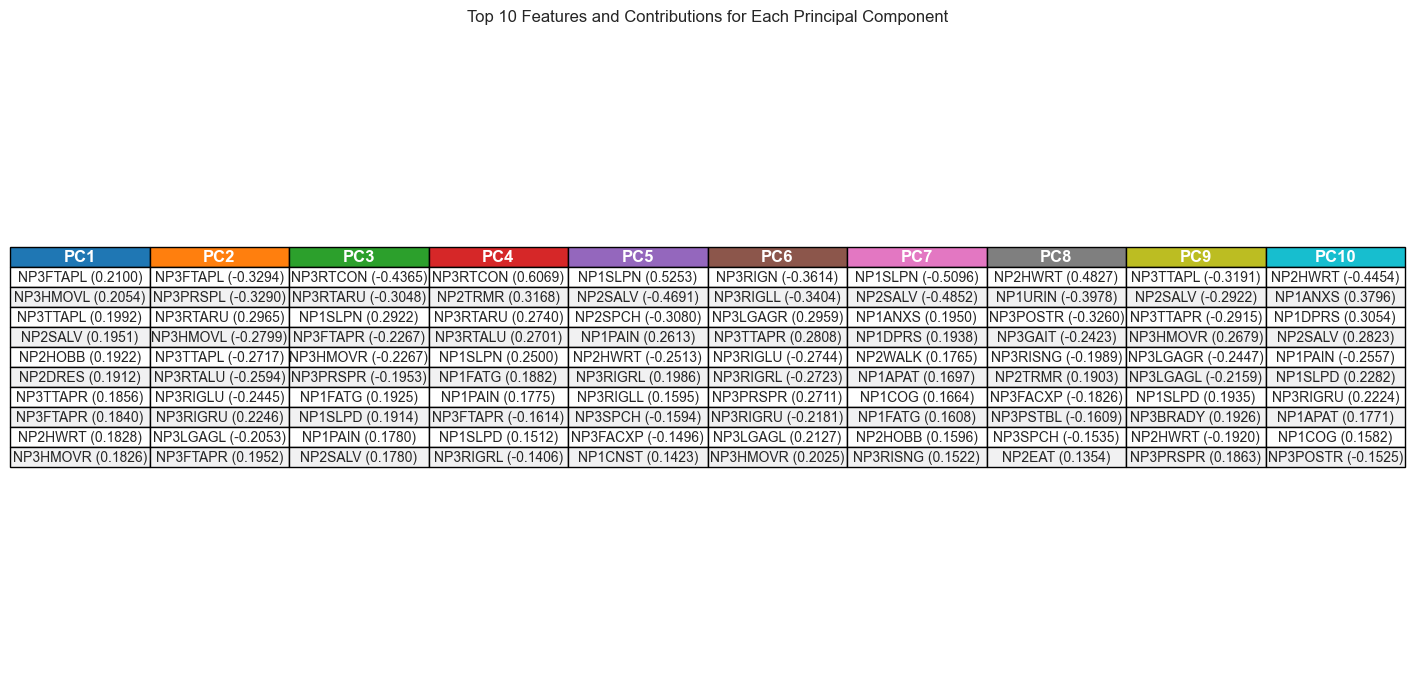

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors as mcolors

# Assuming PCA is already performed and components are stored in 'components'
components = pca.components_
feature_names = X.columns

# Initialize an empty DataFrame to store top features and their contributions for each PCA component
top_features_df = pd.DataFrame()

# Get top 10 features and their contributions for each principal component
top_n = 10  # Number of top features to select
for i in range(components.shape[0]):
    top_features_indices = np.argsort(np.abs(components[i]))[::-1][:top_n]
    top_features = feature_names[top_features_indices]
    top_contributions = components[i, top_features_indices]  # Get the loadings (contributions) with signs

    # Create a new column combining the feature name and its contribution with sign
    top_features_contrib = [f'{feature} ({contrib:.4f})' for feature, contrib in zip(top_features, top_contributions)]
    top_features_df[f'PC{i+1}'] = top_features_contrib  # Store top features with contributions

print(top_features_df)

# Plot the table
fig, ax = plt.subplots(figsize=(15, 8))  # Adjust the size as needed
ax.axis('tight')
ax.axis('off')

# Add cell colors for better visibility
colors = list(mcolors.TABLEAU_COLORS.values())  # Use a color palette from matplotlib
table = ax.table(cellText=top_features_df.values, colLabels=top_features_df.columns, cellLoc='center', loc='center')

# Customize table style
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Set background colors for the header and each row
for i in range(len(top_features_df.columns)):
    table[0, i].set_fontsize(12)
    table[0, i].set_text_props(weight='bold', color='white')
    table[0, i].set_facecolor(colors[i % len(colors)])  # Cycle through colors for headers

# Set alternating row colors for better readability
for i in range(1, top_n+1):
    for j in range(len(top_features_df.columns)):
        table[i, j].set_facecolor('#f1f1f2' if i % 2 == 0 else '#ffffff')  # Light gray and white

plt.title("Top 10 Features and Contributions for Each Principal Component", pad=20)
plt.show()


In [6]:
top_features_union = set()

for i in range(components.shape[0]):
    top_features_indices = np.argsort(np.abs(components[i]))[::-1][:10]
    top_features = feature_names[top_features_indices]
    top_features_union.update(top_features)

# Print the union of top features and its length
print("\nUnion of top 20 features for each principal component:")
print(top_features_union)
print(f"\nLength of union features: {len(top_features_union)}")


Union of top 20 features for each principal component:
{'NP2HWRT', 'NP3RIGN', 'NP3RIGRL', 'NP3RIGLL', 'NP2WALK', 'NP3TTAPL', 'NP3FTAPL', 'NP3PSTBL', 'NP3PRSPL', 'NP3RISNG', 'NP3RIGRU', 'NP2SPCH', 'NP3POSTR', 'NP1FATG', 'NP3GAIT', 'NP3HMOVL', 'NP3RTALU', 'NP2DRES', 'NP1CNST', 'NP3SPCH', 'NP2TRMR', 'NP3RTCON', 'NP3LGAGL', 'NP1SLPD', 'NP3BRADY', 'NP3TTAPR', 'NP1PAIN', 'NP3FTAPR', 'NP1ANXS', 'NP1URIN', 'NP3LGAGR', 'NP1COG', 'NP1APAT', 'NP3RIGLU', 'NP2EAT', 'NP3HMOVR', 'NP3FACXP', 'NP3RTARU', 'NP1SLPN', 'NP1DPRS', 'NP2SALV', 'NP3PRSPR', 'NP2HOBB'}

Length of union features: 43


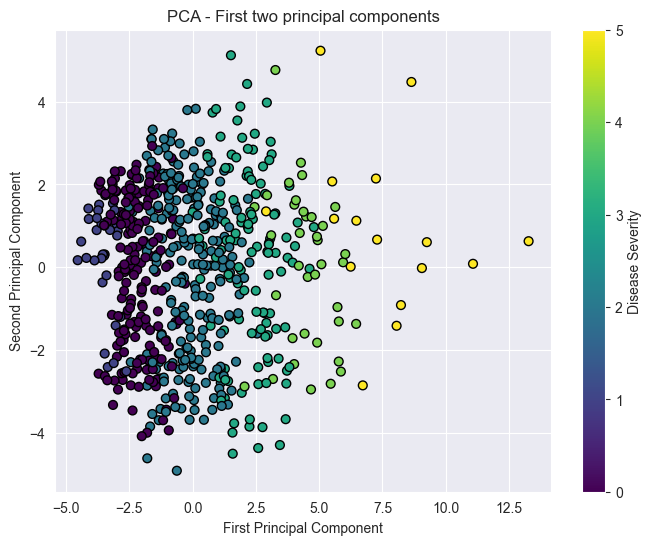

In [7]:
# 6. Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=40)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA - First two principal components')
plt.colorbar(label='Disease Severity')
plt.show()

In [8]:

# 8. Feature Importance
most_valuable_features = [np.abs(pca.components_[i]).argmax() for i in range(pca.components_.shape[0])]
most_valuable_features_names = [X.columns[i] for i in most_valuable_features]


print("\nMost valuable features for each principal component:")
for i, feature in enumerate(most_valuable_features_names):
    print(f"Principal Component {i+1}: {feature}")


Most valuable features for each principal component:
Principal Component 1: NP3FTAPL
Principal Component 2: NP3FTAPL
Principal Component 3: NP3RTCON
Principal Component 4: NP3RTCON
Principal Component 5: NP1SLPN
Principal Component 6: NP3RIGN
Principal Component 7: NP1SLPN
Principal Component 8: NP2HWRT
Principal Component 9: NP3TTAPL
Principal Component 10: NP2HWRT



Correlation matrix of principal components:
 [[ 1.00000000e+00  5.37111726e-17 -2.38247426e-17  4.32292543e-17
   7.49388484e-18  5.67621708e-17 -1.73614851e-17 -3.07748749e-17
  -1.41865229e-17 -1.00020576e-17]
 [ 5.37111726e-17  1.00000000e+00  2.88910011e-16 -3.17010347e-16
   4.57441905e-17 -2.39186198e-17  2.27603802e-17  2.55082604e-17
  -6.19936706e-18  2.95028866e-17]
 [-2.38247426e-17  2.88910011e-16  1.00000000e+00  2.72330369e-17
   1.74310373e-16  3.74087230e-16  7.90841960e-17 -4.09048179e-17
  -7.33296593e-17 -1.16325672e-17]
 [ 4.32292543e-17 -3.17010347e-16  2.72330369e-17  1.00000000e+00
  -4.52182633e-17  1.73257377e-16 -6.01079538e-17 -2.08745212e-17
  -1.49686184e-17  7.91509925e-18]
 [ 7.49388484e-18  4.57441905e-17  1.74310373e-16 -4.52182633e-17
   1.00000000e+00 -4.76103102e-16  2.84610595e-16 -3.55833272e-17
  -1.03793696e-17 -4.66513862e-17]
 [ 5.67621708e-17 -2.39186198e-17  3.74087230e-16  1.73257377e-16
  -4.76103102e-16  1.00000000e+00  1.36668668e-16  1.

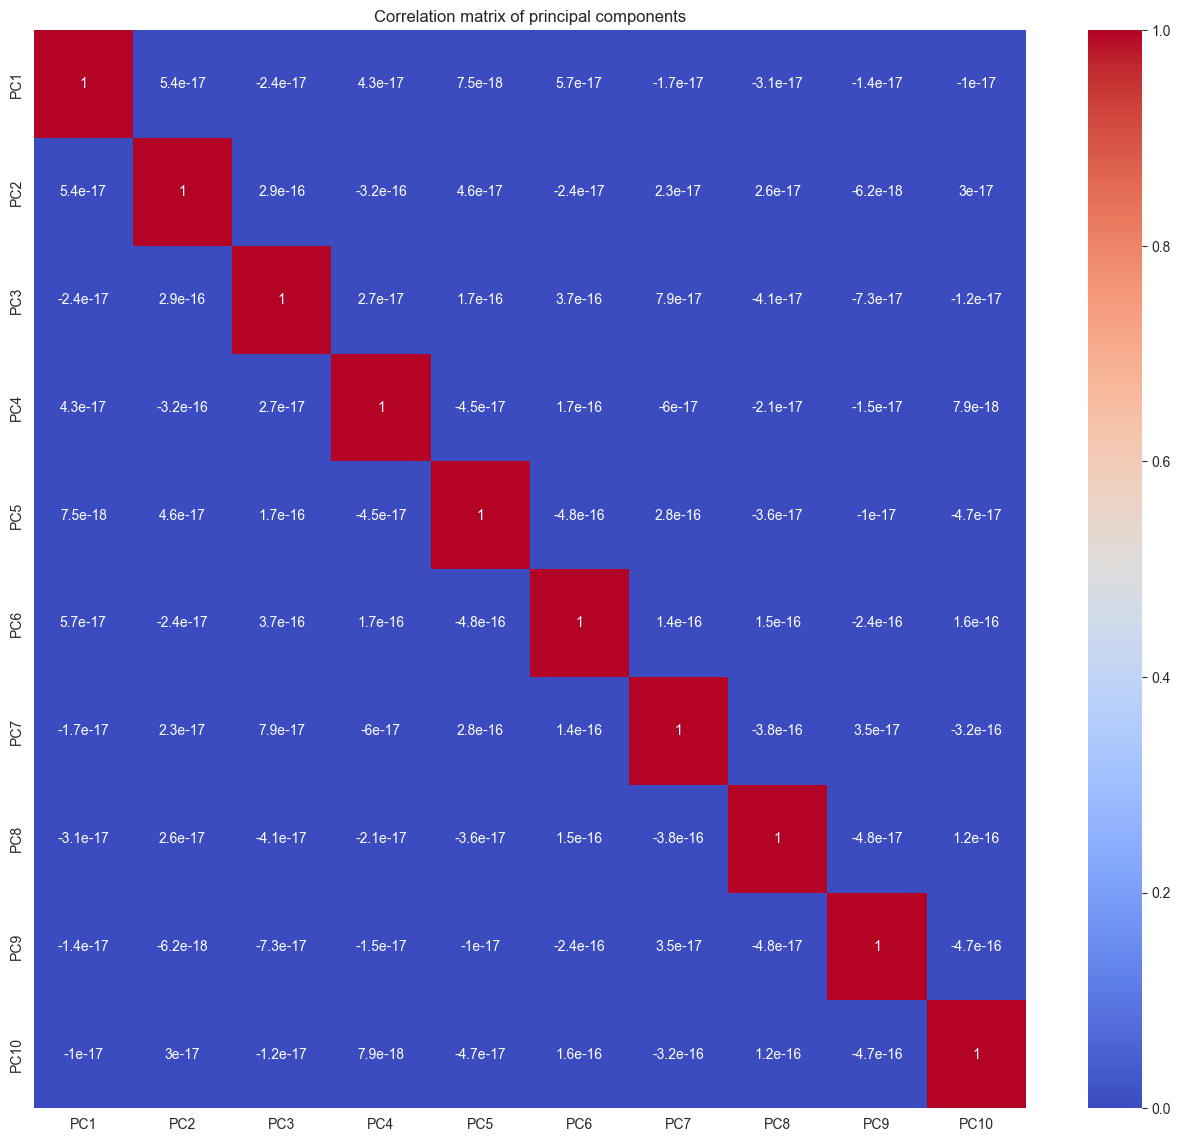

In [9]:
# 9. Multicollinearity
# PCA components are orthogonal, hence uncorrelated
correlation_matrix = np.corrcoef(X_train_pca.T)
print("\nCorrelation matrix of principal components:\n", correlation_matrix)

plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=[f'PC{i+1}' for i in range(pca.n_components_)], yticklabels=[f'PC{i+1}' for i in range(pca.n_components_)])
plt.title('Correlation matrix of principal components')
plt.show()